c:\Users\gaopan\miniconda3\envs\OR\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


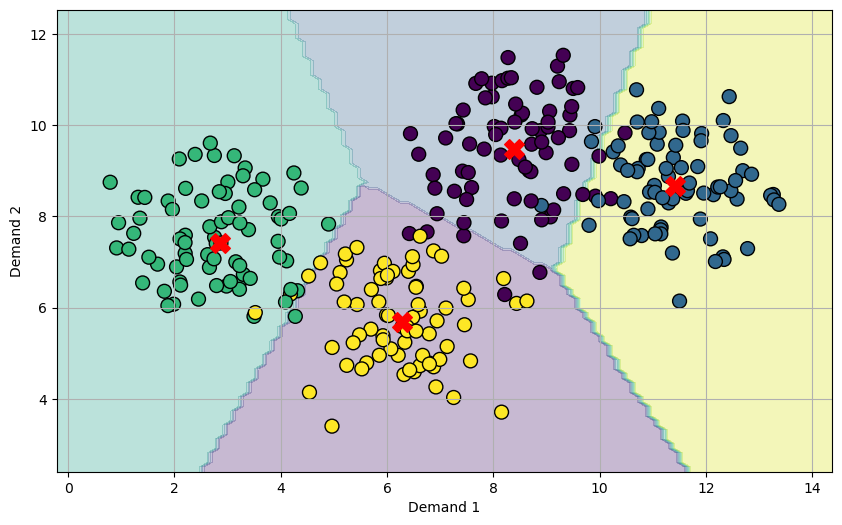

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd

# 生成一个四分类数据集
X, y, centers = make_blobs(
    n_samples=300,          # 样本总数为400
    n_features=2,           # 每个样本的特征数为2，便于可视化
    centers=4,              # 类别总数为4
    cluster_std=1,        # 每个簇的标准差，设置为0.5以使簇更靠近
    random_state=20,        # 随机种子设置为20，确保结果可重复
    return_centers=True,    # 返回簇的质心
    center_box = (0, 10)
)
X = X+[2.5, 0.5]
centers = centers+ [2.5,0.5]
# 将数据集转换为DataFrame以便于可视化
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = y

# 将质心转换为DataFrame
centers_df = pd.DataFrame(centers, columns=['Feature1', 'Feature2'])

# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=4, random_state=20)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# 绘制决策边界
def plot_decision_boundaries(X, model, ax, resolution=100, colors=('C0', 'C1', 'C2')):
    # 创建网格
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))
    
    # 预测网格中的每个点的类别
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.viridis, edgecolor='k')
    ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
    ax.set_xlabel('Demand 1')
    ax.set_ylabel('Demand 2')
    ax.grid(True)

# 使用seaborn进行可视化
plt.figure(figsize=(10, 6))
plot_decision_boundaries(X, kmeans, plt.gca())
plt.savefig('kmeans_clusters.pdf', bbox_inches='tight', dpi=300)
plt.show()